# Data Exploration & Cleaning

In [2]:
import pandas as pd
import re
import matplotlib.pyplot as plt
%matplotlib inline

import nltk
import spacy
import contractions
import unicodedata

In [3]:
episodes_df = pd.read_csv('../data/interim_data/star_trek_episodes_scripts.csv', index_col=0)

In [4]:
episodes_df.head()

,series,production_number,episode_title,script_link,script
0,StarTrek,1,The Cage,http://www.chakoteya.net/StarTrek/1.htm,\n\n\n\n\n\nThe Star Trek Transcripts - The Ca...
1,StarTrek,6,The Man Trap,http://www.chakoteya.net/StarTrek/6.htm,\n\n\n\n\n\nThe Star Trek Transcripts - The Ma...
2,StarTrek,8,Charlie X,http://www.chakoteya.net/StarTrek/8.htm,\n\n\n\n\n\nThe Star Trek Transcripts - Charli...
3,StarTrek,2,Where No Man Has Gone Before,http://www.chakoteya.net/StarTrek/2.htm,\n\n\n\n\n\nThe Star Trek Transcripts - Where ...
4,StarTrek,7,The Naked Time,http://www.chakoteya.net/StarTrek/7.htm,\n\n\n\n\n\nThe Star Trek Transcripts - The Na...


In [6]:
episodes_df[episodes_df.duplicated(keep=False)]

,series,production_number,episode_title,script_link,script


In [7]:
print("Number of series in Dataset: ", episodes_df['series'].nunique())
print("Number of unique episode titles in Dataset: ", episodes_df['episode_title'].nunique())
print("Number of unique episode links in Dataset: ", episodes_df['script_link'].nunique())
print("Number of unique episode scripts in Dataset: ", episodes_df['script'].nunique())

Number of series in Dataset:  6
Number of unique episode titles in Dataset:  728
Number of unique episode links in Dataset:  728
Number of unique episode scripts in Dataset:  724


In [10]:
episodes_df[episodes_df['script'].duplicated(keep=False)]

,series,production_number,episode_title,script_link,script
492,Voyager,222,Basics Part I,http://www.chakoteya.net/Voyager/222.htm,\n\n\n\n\n\nThe Voyager Transcripts - Basics\n...
493,Voyager,222,Basics\r\nPart II,http://www.chakoteya.net/Voyager/222.htm#To%20...,\n\n\n\n\n\nThe Voyager Transcripts - Basics\n...
517,Voyager,321,Scorpion Part I,http://www.chakoteya.net/Voyager/321.htm,\n\n\n\n\n\nThe Voyager Transcripts - Scorpion...
518,Voyager,321,Scorpion\r\nPart 2,http://www.chakoteya.net/Voyager/321.htm#To%20...,\n\n\n\n\n\nThe Voyager Transcripts - Scorpion...
566,Voyager,525,Equinox Part I,http://www.chakoteya.net/Voyager/525.htm,\n\n\n\n\n\nThe Voyager Transcripts - Equinox\...
567,Voyager,525,Equinox\r\nPart 2,http://www.chakoteya.net/Voyager/525.htm#To%20...,\n\n\n\n\n\nThe Voyager Transcripts - Equinox\...
592,Voyager,625,Unimatrix Zero Part I,http://www.chakoteya.net/Voyager/625.htm,\n\n\n\n\n\nThe Voyager Transcripts - Unimatri...
593,Voyager,625,Unimatrix\r\nZero Part II,http://www.chakoteya.net/Voyager/625.htm#To%20...,\n\n\n\n\n\nThe Voyager Transcripts - Unimatri...


Continued episodes link to the same script.

In [14]:
# Change title of first part episodes into part I & II
print(episodes_df.iloc[[492]]['episode_title'])
print(episodes_df.iloc[[493]]['episode_title'])

print(episodes_df.iloc[[517]]['episode_title'])
print(episodes_df.iloc[[518]]['episode_title'])

print(episodes_df.iloc[[566]]['episode_title'])
print(episodes_df.iloc[[567]]['episode_title'])

print(episodes_df.iloc[[592]]['episode_title'])
print(episodes_df.iloc[[593]]['episode_title'])

492    Basics Part I
Name: episode_title, dtype: object
493    Basics\r\nPart II
Name: episode_title, dtype: object
517    Scorpion Part I
Name: episode_title, dtype: object
518    Scorpion\r\nPart 2
Name: episode_title, dtype: object
566    Equinox Part I
Name: episode_title, dtype: object
567    Equinox\r\nPart 2
Name: episode_title, dtype: object
592    Unimatrix Zero Part I
Name: episode_title, dtype: object
593    Unimatrix\r\nZero Part II
Name: episode_title, dtype: object


In [15]:
episodes_df.at[492, 'episode_title'] = 'Basics Part I and II'
episodes_df.at[517, 'episode_title'] = 'Scorpion Part I and II'
episodes_df.at[566, 'episode_title'] = 'Equinox Part I and II'
episodes_df.at[592, 'episode_title'] = 'Unimatrix Part I and II'

In [11]:
# Remove duplicate episodes
episodes_df = episodes_df[~episodes_df['script'].duplicated(keep='first')]

In [12]:
episodes_df[episodes_df.duplicated(['script'])]

,series,production_number,episode_title,script_link,script


In [13]:
episodes_df.describe(include='all')

,series,production_number,episode_title,script_link,script
count,724,724,724,724,724
unique,6,549,724,724,724
top,NextGen,105,Violations,http://www.chakoteya.net/Enterprise/07.htm,\n\n\n\n\n\nThe Enterprise Transcripts - Deser...
freq,176,3,1,1,1


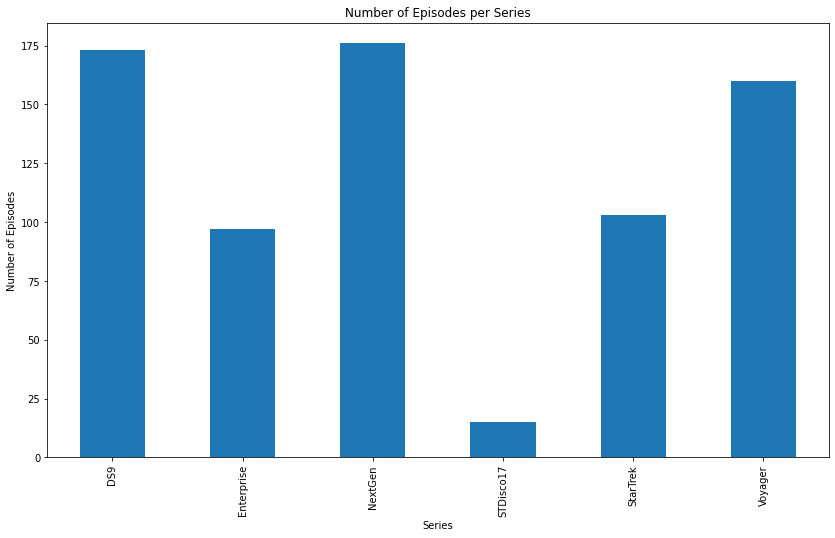

In [14]:
ax = episodes_df['series'].value_counts().sort_index().plot(kind='bar',
                                         figsize=(14,8))
plt.xlabel('Series')
plt.ylabel('Number of Episodes')
plt.title('Number of Episodes per Series')
plt.show()

## Clean up titles

In [15]:
pd.set_option('display.max_rows', None)
episodes_df['episode_title']

0                                              The Cage
1                                          The Man Trap
2                                             Charlie X
3                          Where No Man Has Gone Before
4                                        The Naked Time
5                                      The Enemy Within
6                                          Mudd's Women
7                        What Are Little Girls Made Of?
8                                                  Miri
9                                    Dagger Of The Mind
10                               The Corbomite Maneuver
11                                The Menagerie, part 1
12                                The Menagerie, part 2
13                           The Conscience of the King
14                                    Balance of Terror
15                                          Shore Leave
16                                    The Galileo Seven
17                                 The Squire of

In [16]:
def clean_title(title):
    # remove leading/trailing whitespace
    clean_title = title.strip()
    # replace '\r\n' char sequance
    clean_title = clean_title.replace('\r\n',' ')
    return clean_title

In [17]:
episodes_df['episode_title_processed'] = episodes_df['episode_title'].map(lambda x: clean_title(x))

In [18]:
episodes_df[['episode_title', 'episode_title_processed']]

,episode_title,episode_title_processed
0,The Cage,The Cage
1,The Man Trap,The Man Trap
2,Charlie X,Charlie X
3,Where No Man Has Gone Before,Where No Man Has Gone Before
4,The Naked Time,The Naked Time
5,The Enemy Within,The Enemy Within
6,Mudd's Women,Mudd's Women
7,What Are Little Girls Made Of?,What Are Little Girls Made Of?
8,Miri,Miri
9,Dagger Of The Mind,Dagger Of The Mind


------

In [20]:
test_txt = episodes_df.iloc[700]['script']
test_txt

"\n\n\n\n\n\nThe Enterprise Transcripts - The Aenar\n\n\nThe Aenar\n Original Airdate: 11 Feb, 2005\n\n\n\n\n\n\n  T'POL:\r\nPreviously on Enterprise.\n\nARCHER [Ready\r\nroom]: From what I've heard about these Romulans, they\r\nmean business. We have to find some way to stop them, or next time they\r\nmight come back with a thousand of those ships. \r\nSHRAN [Conference room]: Unless\r\nthis murderer meets me in combat, your precious alliance is finished! \r\nSHRAN [Shran's quarters]: The\r\nAmbassador's decided to fight in place of his underling? \r\nARCHER: Not the Ambassador. \r\n(Shots from the fight, and then a shot of the airlock on the Romulan\r\nship opening.) \r\nARCHER [Bridge]: Trip,\r\nMalcolm, we can make one more pass. Get the hell out of there. \r\nT'POL: They're clear. \r\nNIJIL [Control area]: The\r\nDrone has re-entered Romulan space. \r\nVALDORE: Disconnect the pilot. \r\n(We see the blind, white-skinned Andorian.) \r\nGRAL [Conference room]:\r\nI believe we have mo

In [21]:
# replace \r\n character sequence with space
clean_text = test_txt.replace('\r\n', ' ')

In [23]:
# remove accented characters
clean_text = unicodedata.normalize('NFKD', clean_text).encode('ascii', 'ignore').decode('utf-8', 'ignore')

In [25]:
# remove repeated whitespace inside a string
clean_text = re.sub('\s+',' ', clean_text) 

In [ ]:
# replace multiple newlines with space
#clean_text = re.sub(r'\n+', ' ', clean_text)

In [27]:
# remove leading and trailing whitespace
clean_text = clean_text.strip()

In [62]:
clean_text = clean_text.replace("' '", '')

In [63]:
# text inside [] signifies location
re.findall(r"\[([A-Za-z0-9_]+)\]", clean_text)

['Bridge',
 'OC',
 'OC',
 'OC',
 'Sickbay',
 'Andoria',
 'Sickbay',
 'Corridor',
 'Sickbay',
 'Sickbay',
 'Corridor',
 'Sickbay',
 'Bridge',
 'Sickbay',
 'Bridge',
 'Sickbay',
 'Bridge',
 'Sickbay',
 'Bridge',
 'Sickbay',
 'Bridge',
 'Bridge']

In [88]:
#clean_text = clean_text.replace(r"\[([A-Za-z0-9_]+)\]", '')

In [90]:
# remove all text inside []
clean_text = re.sub("[\[].*?[\]]", "", clean_text)

In [92]:
# remove space before :
clean_text = re.sub(' :', ':', clean_text)

In [93]:
clean_text

"The Enterprise Transcripts - The Aenar The Aenar Original Airdate: 11 Feb, 2005 T'POL: Previously on Enterprise. ARCHER: From what I've heard about these Romulans, they mean business. We have to find some way to stop them, or next time they might come back with a thousand of those ships. SHRAN: Unless this murderer meets me in combat, your precious alliance is finished! SHRAN: The Ambassador's decided to fight in place of his underling? ARCHER: Not the Ambassador. (Shots from the fight, and then a shot of the airlock on the Romulan ship opening.) ARCHER: Trip, Malcolm, we can make one more pass. Get the hell out of there. T'POL: They're clear. NIJIL: The Drone has re-entered Romulan space. VALDORE: Disconnect the pilot. (We see the blind, white-skinned Andorian.) GRAL: I believe we have more to discuss than trade disputes. ARCHER: There's no reason our people can't become allies. T'POL: And now, the conclusion.  VRAX: This mission was supposed to cause dissension in the region. It's h

In [102]:
clean_text = clean_text.replace("T'POL", 'TPOL')

In [43]:
#nlp = spacy.load("en_core_web_sm")
import en_core_web_sm
nlp = en_core_web_sm.load()

In [46]:
doc = nlp(clean_text)
for ent in doc.ents:
    print(ent.text, ent.start_char, ent.end_char, ent.label_)

11 67 69 CARDINAL
Feb, 2005 70 79 DATE
a thousand 275 285 CARDINAL
Romulan 580 587 GPE
Trip 620 624 PERSON
Malcolm 626 633 PERSON
one 647 650 CARDINAL
NIJIL 711 716 ORG
Drone 737 742 ORG
Romulan 758 765 NORP
Andorian 837 845 NORP
Andorians 1184 1193 NORP
Tellarites 1198 1208 ORG
first 1267 1272 ORDINAL
First Consul 1603 1615 ORG
Andorians 1790 1799 NORP
Tellarites 1804 1814 ORG
second 1829 1835 ORDINAL
Drone 1836 1841 CARDINAL
two 1883 1886 CARDINAL
Tellarite 2040 2049 NORP
Shran 2083 2088 PERSON
Drone 2175 2180 ORG
that years ago 2322 2336 DATE
REED 2441 2445 ORG
TUCKER 2489 2495 PERSON
TUCKER 2588 2594 PERSON
Tucker 2718 2724 PERSON
TUCKER 2797 2803 PERSON
one 2956 2959 CARDINAL
Andorian 3377 3385 NORP
at least three days 3710 3729 DATE
one 3820 3823 CARDINAL
two 3860 3863 CARDINAL
Earth 4261 4266 LOC
Andorian 4503 4511 NORP
Aenar 4529 4534 PERSON
fifty years ago 4674 4689 DATE
the Northern Wastes 4722 4741 LOC
Andorians 4810 4819 NORP
only a few thousand 4965 4984 CARDINAL
One 5082 

In [48]:
from spacy import displacy
displacy.serve(doc, style="ent")

/opt/anaconda3/envs/NlpRPySandbox/lib/python3.8/site-packages/spacy/displacy/__init__.py:94: UserWarning: [W011] It looks like you're calling displacy.serve from within a Jupyter notebook or a similar environment. This likely means you're already running a local web server, so there's no need to make displaCy start another one. Instead, you should be able to replace displacy.serve with displacy.render to show the visualization.
  warnings.warn(Warnings.W011)



Using the 'ent' visualizer
Serving on http://0.0.0.0:5000 ...

Shutting down server on port 5000.


In [49]:
for token in doc:
    print(token.text, token.dep_, token.head.text, token.head.pos_,
            [child for child in token.children])

The det Transcripts NOUN []
Enterprise compound Transcripts NOUN []
Transcripts ROOT Transcripts NOUN [The, Enterprise, -, Aenar]
- punct Transcripts NOUN []
The det Aenar PROPN []
Aenar appos Transcripts NOUN [The]
The compound Airdate PROPN []
Aenar compound Airdate PROPN []
Original compound Airdate PROPN []
Airdate ROOT Airdate PROPN [The, Aenar, Original, :, Feb, .]
: punct Airdate PROPN []
11 nummod Feb PROPN []
Feb appos Airdate PROPN [11, ,, 2005, T'POL, :, on]
, punct Feb PROPN []
2005 appos Feb PROPN []
T'POL appos Feb PROPN []
: punct Feb PROPN []
Previously advmod on ADP []
on prep Feb PROPN [Previously, Enterprise]
Enterprise pobj on ADP []
. punct Airdate PROPN []
ARCHER nmod room NOUN []
[ punct room NOUN []
Ready amod room NOUN []
room ROOT room NOUN [ARCHER, [, Ready, ], :]
] punct room NOUN []
: punct room NOUN []
From prep mean VERB [heard]
what dobj heard VERB []
I nsubj heard VERB []
've aux heard VERB []
heard pcomp From ADP [what, I, 've, about]
about prep heard 

and cc stay VERB []
help conj stay VERB [track]
us nsubj track VERB []
track ccomp help VERB [us, down]
down prt track VERB [marauder]
the det marauder NOUN []
marauder pobj down ADP [the]
. punct offered VERB []
[ punct room NOUN []
Conference compound room NOUN []
room ROOT room NOUN [[, Conference, ], T'POL, :]
] punct room NOUN []
T'POL appos room NOUN []
: punct room NOUN []
The det Drone PROPN []
Drone nsubjpass operated VERB [The]
is aux operated VERB []
being auxpass operated VERB []
operated ROOT operated VERB [Drone, is, being, by, .]
by agent operated VERB [telepresence]
telepresence pobj by ADP []
. punct operated VERB []
It nsubj 's AUX []
's ROOT 's AUX [It, process, .]
a det process NOUN []
process attr 's AUX [a, allows]
which nsubj allows VERB []
allows relcl process NOUN [which, controlled]
a det vessel NOUN []
vessel nsubjpass controlled VERB [a]
to aux controlled VERB []
be auxpass controlled VERB []
controlled ccomp allows VERB [vessel, to, be, from]
from prep cont

permanently advmod damaged VERB []
damaged ROOT damaged VERB [He, could, be, permanently, .]
. punct damaged VERB []
He nsubj die VERB []
could aux die VERB []
die ROOT die VERB [He, could, .]
. punct die VERB []
VALDORE ROOT VALDORE NOUN []
: punct say VERB []
If mark know VERB []
I nsubj know VERB []
did aux know VERB []
n't neg know VERB []
know advcl say VERB [If, I, did, n't, you, better]
you dobj know VERB []
better advmod know VERB []
, punct say VERB []
I nsubj say VERB []
would aux say VERB []
say ROOT say VERB [:, know, ,, I, would, 're, .]
you nsubj 're AUX []
're ccomp say VERB [you, concerned, are]
more advmod concerned ADJ []
concerned acomp 're AUX [more, with]
with prep concerned ADJ [being]
this det creature NOUN []
creature poss being NOUN [this, 's]
's case creature NOUN []
well compound being NOUN []
- punct being NOUN []
being pobj with ADP [creature, well, -]
than mark are AUX []
you nsubj are AUX []
are advcl 're AUX [than, you, with]
with prep are AUX [mission]


, punct Set VERB []
maximum amod warp NOUN []
warp dep Set VERB [maximum]
. punct Set VERB []
[ punct Sickbay PROPN []
Sickbay nsubjpass filled VERB [[, ]]
] punct Sickbay PROPN []
( punct filled VERB []
The det place NOUN []
place nsubjpass filled VERB [The]
is auxpass filled VERB []
almost advmod filled VERB []
filled ROOT filled VERB [Sickbay, (, place, is, almost, with, ., )]
with prep filled VERB [equipment]
strange amod equipment NOUN []
equipment pobj with ADP [strange, and, tubing]
and cc equipment NOUN []
thick amod tubing NOUN []
rubber compound tubing NOUN []
tubing conj equipment NOUN [thick, rubber]
. punct filled VERB []
) punct filled VERB []
T'POL dep rest VERB []
: punct rest VERB []
You nsubj rest VERB []
should aux rest VERB []
rest ROOT rest VERB [T'POL, :, You, should, .]
. punct rest VERB []
TUCKER ROOT TUCKER PROPN [:]
: punct TUCKER PROPN []
I nsubj need VERB []
just advmod need VERB []
need ROOT need VERB [I, just, second, .]
a det second NOUN []
second dobj ne

of prep show NOUN [force]
force pobj of ADP []
, punct get AUX []
we nsubj get AUX []
wo aux get AUX []
n't neg get AUX []
get conj go VERB [,, we, wo, n't, thing, out, .]
a det thing NOUN []
thing dobj get AUX [a]
out prep get AUX [of]
of prep out SCONJ [them]
them pobj of ADP []
. punct get AUX []
ARCHER ROOT ARCHER PROPN [:]
: punct ARCHER PROPN []
We nsubj going VERB []
're aux going VERB []
going ROOT going VERB [We, 're, alone, .]
alone advmod going VERB []
. punct going VERB []
REED ROOT REED PROPN [:]
: punct REED PROPN []
Captain npadvmod know VERB []
, punct know VERB []
we nsubj know VERB []
do aux know VERB []
n't neg know VERB []
know ROOT know VERB [Captain, ,, we, do, n't, anything, .]
anything dobj know VERB [about]
about prep anything PRON [people]
these det people NOUN []
people pobj about ADP [these]
. punct know VERB []
ARCHER ROOT ARCHER PROPN [:]
: punct ARCHER PROPN []
That nsubj 's AUX []
's ROOT 's AUX [That, 're, .]
why advmod 're AUX []
we nsubj 're AUX []
'r

SHRAN ROOT SHRAN NOUN [:, bores, .]
: punct SHRAN NOUN []
Ice compound bores NOUN []
- punct bores NOUN []
bores appos SHRAN NOUN [Ice, -]
. punct SHRAN NOUN []
Worms ROOT Worms NOUN [.]
. punct Worms NOUN []
They nsubj live VERB []
live ROOT live VERB [They, in, .]
in prep live VERB [ice]
the det ice NOUN []
ice pobj in ADP [the]
. punct live VERB []
Generate ROOT Generate PROPN [heat, through, .]
heat dobj Generate PROPN []
through prep Generate PROPN [reaction]
a det reaction NOUN []
chemical compound reaction NOUN []
reaction pobj through ADP [a, chemical]
. punct Generate PROPN []
Big amod swarm NOUN []
swarm nsubj came VERB [Big]
came ROOT came VERB [swarm, through, ago, .]
through prep came VERB [here]
here pcomp through ADP []
a det day NOUN []
day npadvmod ago ADV [a, two]
or cc two NUM []
two nummod day NOUN [or]
ago advmod came VERB [day]
. punct came VERB []
ARCHER ROOT ARCHER PROPN [:]
: punct ARCHER PROPN []
I nsubj 'm AUX []
'm ROOT 'm AUX [I, sure, .]
sure acomp 'm AUX 

the det one NUM []
first amod one NUM []
one attr be AUX [the, first, try]
to aux try VERB []
try relcl one NUM [to, it, out]
it dobj try VERB []
out prt try VERB []
. punct want VERB []
T'POL ROOT T'POL X []
: punct 're AUX []
You nsubj 're AUX []
're ROOT 're AUX [:, You, not, telepathic, .]
not neg 're AUX []
telepathic acomp 're AUX []
. punct 're AUX []
It nsubj be AUX []
would aux be AUX []
n't neg be AUX []
be ROOT be AUX [It, would, n't, measure, .]
a det measure NOUN []
true amod measure NOUN []
measure attr be AUX [a, true, of]
of prep measure NOUN [effectiveness]
the det unit NOUN []
unit poss effectiveness NOUN [the, 's]
's case unit NOUN []
effectiveness pobj of ADP [unit]
. punct be AUX []
TUCKER ROOT TUCKER PROPN [:]
: punct TUCKER PROPN []
Well intj find VERB []
, punct find VERB []
at advmod least ADJ []
least advmod find VERB [at]
we nsubj find VERB []
'll aux find VERB []
find ROOT find VERB [Well, ,, least, we, 'll, out, causes, .]
out prt find VERB []
if mark cause

time dobj save VERB []
and cc save VERB []
foster conj save VERB [trust]
our poss trust NOUN []
trust dobj foster VERB [our]
, punct save VERB []
if mark have AUX []
I nsubj have AUX []
can aux have AUX []
have advcl save VERB [if, I, can, thoughts]
your poss thoughts NOUN []
thoughts dobj have AUX [your]
. punct save VERB []
( punct shakes VERB []
Shran nsubj shakes VERB []
shakes ROOT shakes VERB [(, Shran, head, ., )]
his poss head NOUN []
head dobj shakes VERB [his]
. punct shakes VERB []
) punct shakes VERB []
ARCHER ROOT ARCHER PROPN [:]
: punct ARCHER PROPN []
Go ROOT Go VERB [ahead, .]
ahead advmod Go VERB []
. punct Go VERB []
LISSAN ROOT LISSAN PROPN []
: punct have AUX []
You nsubj have AUX []
have ROOT have AUX [:, You, mind, .]
an det mind NOUN []
interesting amod mind NOUN []
mind dobj have AUX [an, interesting, ,, Captain]
, punct mind NOUN []
Captain appos mind NOUN []
. punct have AUX []
Many amod facets NOUN []
facets ROOT facets NOUN [Many, .]
. punct facets NOUN []


with prep Walking VERB [mug]
his poss mug NOUN []
mug pobj with ADP [his]
. punct Corridor PROPN []
) punct Corridor PROPN []
T'POL ROOT T'POL X [Commander]
: punct Commander PROPN []
Commander appos T'POL X [:, .]
. punct Commander PROPN []
TUCKER ROOT TUCKER PROPN [:]
: punct TUCKER PROPN []
Hey ROOT Hey INTJ [.]
. punct Hey INTJ []
( punct keeps VERB []
He nsubj keeps VERB []
keeps ROOT keeps VERB [(, He, walking, ., )]
walking xcomp keeps VERB []
. punct keeps VERB []
) punct keeps VERB []
T'POL ROOT T'POL NOUN []
: punct Trip NOUN []
Trip ROOT Trip NOUN [:, .]
. punct Trip NOUN []
I nsubj appreciate VERB []
appreciate ROOT appreciate VERB [I, concern, .]
your poss concern NOUN []
concern dobj appreciate VERB [your, for]
for prep concern NOUN [safety]
my poss safety NOUN []
safety pobj for ADP [my]
. punct appreciate VERB []
TUCKER ROOT TUCKER PROPN [:]
: punct TUCKER PROPN []
I nsubj want VERB []
just advmod want VERB []
do aux want VERB []
n't neg want VERB []
want ROOT want VERB

cage pobj in ADP [a, strange]
. punct bound VERB []
He nsubj calling VERB []
's aux calling VERB []
calling ROOT calling VERB [He, 's, for, .]
for prep calling VERB [me]
me pobj for ADP []
. punct calling VERB []
He nsubj wants VERB []
wants ROOT wants VERB [He, rescue, .]
me nsubj rescue VERB []
to aux rescue VERB []
rescue ccomp wants VERB [me, to, him]
him dobj rescue VERB []
. punct wants VERB []
[ punct area NOUN []
Control compound area NOUN []
area nsubjpass lead VERB [[, Control, ]]
] punct area NOUN []
( punct is AUX []
Gareb nsubj is AUX []
is auxpass lead VERB [(, Gareb]
lead ROOT lead VERB [area, is, in, and, put, ., )]
back advmod in ADV []
in advmod lead VERB [back]
and cc lead VERB []
put conj lead VERB [into]
into prep put VERB [chair]
the det pilot NOUN []
pilot poss chair NOUN [the, 's]
's case pilot NOUN []
chair pobj into ADP [pilot]
. punct lead VERB []
) punct lead VERB []
NIJIL ROOT NIJIL PROPN []
: punct Forgive VERB []
Forgive ROOT Forgive VERB [:, me, .]
me do

loved ROOT loved VERB [Gareb, chasing, .]
chasing xcomp loved VERB [bores]
ice compound bores NOUN []
- punct bores NOUN []
bores dobj chasing VERB [ice, -]
. punct loved VERB []
Once advmod followed VERB []
, punct followed VERB []
we nsubj followed VERB []
followed ROOT followed VERB [Once, ,, we, swarm, for, ,, caught, .]
a det swarm NOUN []
swarm dobj followed VERB [a]
for prep followed VERB [hours]
two nummod hours NOUN []
hours pobj for ADP [two]
, punct followed VERB []
caught conj followed VERB [hundreds]
hundreds dobj caught VERB [of]
of prep hundreds NOUN [them]
them pobj of ADP []
. punct followed VERB []
We nsubj were AUX []
were ROOT were AUX [We, at, .]
almost advmod at ADP []
at prep were AUX [almost, surface]
the det surface NOUN []
surface pobj at ADP [the]
. punct were AUX []
My poss family NOUN []
family nsubj was AUX [My]
was ROOT was AUX [family, worried, .]
very advmod worried ADJ []
worried acomp was AUX [very]
. punct was AUX []
They nsubj going VERB []
're aux 

do aux want VERB []
n't neg want VERB []
want ROOT want VERB [JHAMEL, :, I, do, n't, fight, .]
to aux fight VERB []
fight xcomp want VERB [to, anyone]
anyone dobj fight VERB []
. punct want VERB []
I nsubj want VERB []
want ROOT want VERB [I, help, .]
to aux help VERB []
help xcomp want VERB [to, brother]
my poss brother NOUN []
brother dobj help VERB [my]
. punct want VERB []
LISSAN ROOT LISSAN PROPN []
; punct Help VERB []
Help ROOT Help VERB [;, him, by, .]
him dobj Help VERB []
by prep Help VERB [standing]
standing pcomp by ADP [up, for]
up prt standing VERB []
for prep standing VERB [believe]
what pobj in ADP []
we nsubj believe VERB []
believe pcomp for ADP [we, in]
in prep believe VERB [what]
. punct Help VERB []
ARCHER ROOT ARCHER PROPN [:]
: punct ARCHER PROPN []
She nsubj doing VERB []
's aux doing VERB []
doing ROOT doing VERB [She, 's, thinks, .]
what nsubj is AUX []
she nsubj thinks VERB []
thinks ccomp doing VERB [she, is]
is ccomp thinks VERB [what, right]
right acomp is

simulate ROOT simulate VERB [We, could, correction, .]
a det correction NOUN []
course compound correction NOUN []
correction dobj simulate VERB [a, course]
. punct simulate VERB []
( punct sways VERB []
The det biobed VERB []
biobed nsubj sways VERB [The]
sways ccomp gasps VERB [(, biobed, from]
from prep sways VERB [side, to]
side pobj from ADP []
to prep from ADP [side]
side pobj to ADP []
, punct gasps VERB []
then advmod gasps VERB []
she nsubj gasps VERB []
gasps ROOT gasps VERB [sways, ,, then, she, ., )]
. punct gasps VERB []
) punct gasps VERB []
PHLOX ROOT PHLOX PROPN [:, trouble, .]
: punct PHLOX PROPN []
Synaptic amod trouble NOUN []
trouble appos PHLOX PROPN [Synaptic]
. punct PHLOX PROPN []
SHRAN ROOT SHRAN NOUN [:]
: punct SHRAN NOUN []
Shut ROOT Shut VERB [it, down, !]
it dobj Shut VERB []
down prt Shut VERB []
! punct Shut VERB []
( punct get VERB []
They nsubj get VERB []
get ROOT get VERB [(, They, helmet, off, and, gives]
the det helmet NOUN []
helmet dobj get VERB 

shakes ROOT shakes VERB [(, Hoshi, head, ., )]
her poss head NOUN []
head dobj shakes VERB [her]
. punct shakes VERB []
) punct shakes VERB []
TRAVIS ROOT TRAVIS NOUN [:, kilometres, .]
: punct TRAVIS NOUN []
One compound hundred NUM []
hundred nummod kilometres NOUN [One]
kilometres appos TRAVIS NOUN [hundred]
. punct TRAVIS NOUN []
ARCHER ROOT ARCHER PROPN [:, Fire, .]
: punct ARCHER PROPN []
Fire appos ARCHER PROPN []
. punct ARCHER PROPN []
( punct loses VERB []
The det freighter NOUN []
freighter nsubj loses VERB [The]
loses ROOT loses VERB [(, freighter, skin, to, ., )]
its poss skin NOUN []
holographic amod skin NOUN []
skin dobj loses VERB [its, holographic, and, reverts]
and cc skin NOUN []
reverts conj skin NOUN []
to prep loses VERB [appearance]
its poss appearance NOUN []
proper amod appearance NOUN []
appearance pobj to ADP [its, proper, -, Drone]
- punct appearance NOUN []
a det Drone PROPN []
Drone appos appearance NOUN [a, ,, attacks]
, punct Drone PROPN []
which nsubj 

GAREB appos conversation NOUN [:]
: punct GAREB PROPN []
Jhamel ROOT Jhamel PROPN [?]
? punct Jhamel PROPN []
JHAMEL ROOT JHAMEL PROPN [:]
: punct JHAMEL PROPN []
It nsubj 's AUX []
's ROOT 's AUX [It, me, .]
me attr 's AUX []
. punct 's AUX []
GAREB ROOT GAREB PROPN [:]
: punct GAREB PROPN []
It nsubj 's AUX []
's ROOT 's AUX [It, not, possible, .]
not neg 's AUX []
possible acomp 's AUX []
. punct 's AUX []
How ROOT How ADV [?]
? punct How ADV []
JHAMEL ROOT JHAMEL PROPN [:]
: punct JHAMEL PROPN []
You nsubj have AUX []
have ROOT have AUX [You, stop, .]
to aux stop VERB []
stop xcomp have AUX [to, doing]
what dobj doing VERB []
you nsubj doing VERB []
're aux doing VERB []
doing ccomp stop VERB [what, you, 're]
. punct have AUX []
GAREB ROOT GAREB PROPN [:]
: punct GAREB PROPN []
Where advmod are AUX []
are ROOT are AUX [Where, you, ?]
you nsubj are AUX []
? punct are AUX []
JHAMEL ROOT JHAMEL PROPN [:]
: punct JHAMEL PROPN []
I nsubj 'm AUX []
'm ROOT 'm AUX [I, on, .]
on prep 'm AU

you dative owe VERB []
a det thanks NOUN []
thanks dobj owe VERB [a]
. punct owe VERB []
If mark come VERB []
I nsubj come VERB []
had aux come VERB []
n't neg come VERB []
come advcl died VERB [If, I, had, n't, with]
with prep come VERB [you]
you pobj with ADP []
, punct died VERB []
my poss brother NOUN []
brother nsubj died VERB [my]
would aux died VERB []
have aux died VERB []
died ROOT died VERB [come, ,, brother, would, have, alone, .]
alone advmod died VERB []
. punct died VERB []
Goodbye ROOT Goodbye INTJ [,, Captain, .]
, punct Goodbye INTJ []
Captain npadvmod Goodbye INTJ []
. punct Goodbye INTJ []
ARCHER ROOT ARCHER PROPN [:, Goodbye, .]
: punct ARCHER PROPN []
Goodbye appos ARCHER PROPN []
. punct ARCHER PROPN []
SHRAN ROOT SHRAN NOUN [:]
: punct SHRAN NOUN []
I nsubj regret VERB []
regret ROOT regret VERB [I, much, .]
much dobj regret VERB [of]
of prep much ADJ [happened]
what nsubj happened VERB []
happened pcomp of ADP [what, between, recently]
between prep happened VERB

: punct TUCKER PROPN []
My poss mind NOUN []
mind nsubj was AUX [My]
was ROOT was AUX [mind, n't, on, .]
n't neg was AUX []
on prep was AUX [job]
the det job NOUN []
job pobj on ADP [the]
. punct was AUX []
ARCHER ROOT ARCHER PROPN [:]
: punct ARCHER PROPN []
If mark were AUX []
that nsubj were AUX []
were advcl standing VERB [If, that, true]
true acomp were AUX []
, punct standing VERB []
we nsubj standing VERB []
probably advmod standing VERB []
would aux standing VERB []
n't neg standing VERB []
be aux standing VERB []
standing ROOT standing VERB [were, ,, we, probably, would, n't, be, here, now, .]
here advmod standing VERB []
now advmod standing VERB []
. punct standing VERB []
TUCKER ROOT TUCKER PROPN [:]
: punct TUCKER PROPN []
Captain npadvmod want VERB []
, punct want VERB []
I nsubj want VERB []
want ROOT want VERB [Captain, ,, I, transfer, .]
a det transfer NOUN []
transfer dobj want VERB [a]
. punct want VERB []
ARCHER ROOT ARCHER PROPN [:]
: punct ARCHER PROPN []
Where ROO

In [103]:
# Words in capital letters are character names
person_list = re.findall(r"(\w+)*:", clean_text)
person_list

['Airdate',
 'TPOL',
 'ARCHER',
 'SHRAN',
 'SHRAN',
 'ARCHER',
 'ARCHER',
 'TPOL',
 'NIJIL',
 'VALDORE',
 'GRAL',
 'ARCHER',
 'TPOL',
 'VRAX',
 'VALDORE',
 'VRAX',
 'VALDORE',
 'VRAX',
 'VALDORE',
 'VRAX',
 'VALDORE',
 'VRAX',
 'VALDORE',
 'TPOL',
 'SHRAN',
 'TPOL',
 'REED',
 'TUCKER',
 'TPOL',
 'TUCKER',
 'ARCHER',
 'TPOL',
 'TUCKER',
 'TPOL',
 'ARCHER',
 'TPOL',
 'PHLOX',
 'TPOL',
 'ARCHER',
 'PHLOX',
 'ARCHER',
 'PHLOX',
 'NIJIL',
 'VALDORE',
 'NIJIL',
 'VALDORE',
 'NIJIL',
 'VALDORE',
 'NIJIL',
 'VALDORE',
 'NIJIL',
 'VALDORE',
 'NIJIL',
 'VALDORE',
 'ARCHER',
 'SHRAN',
 'ARCHER',
 'SHRAN',
 'ARCHER',
 'SHRAN',
 'ARCHER',
 'SHRAN',
 'ARCHER',
 'SHRAN',
 'ARCHER',
 'TRAVIS',
 'ARCHER',
 'TPOL',
 'TUCKER',
 'TPOL',
 'TUCKER',
 'TPOL',
 'TUCKER',
 'TPOL',
 'TUCKER',
 'TPOL',
 'TUCKER',
 'TPOL',
 'TUCKER',
 'TPOL',
 'TUCKER',
 'TPOL',
 'TUCKER',
 'REED',
 'SHRAN',
 'ARCHER',
 'REED',
 'ARCHER',
 'SHRAN',
 'ARCHER',
 'SHRAN',
 'ARCHER',
 'SHRAN',
 'ARCHER',
 'SHRAN',
 'ARCHER',
 'SHRAN'

In [116]:
re.sub(r'(\w+):', r'\n\1:', clean_text).split('\n')


['The Enterprise Transcripts - The Aenar The Aenar Original ',
 'Airdate: 11 Feb, 2005 ',
 'TPOL: Previously on Enterprise. ',
 "ARCHER: From what I've heard about these Romulans, they mean business. We have to find some way to stop them, or next time they might come back with a thousand of those ships. ",
 'SHRAN: Unless this murderer meets me in combat, your precious alliance is finished! ',
 "SHRAN: The Ambassador's decided to fight in place of his underling? ",
 'ARCHER: Not the Ambassador. (Shots from the fight, and then a shot of the airlock on the Romulan ship opening.) ',
 'ARCHER: Trip, Malcolm, we can make one more pass. Get the hell out of there. ',
 "TPOL: They're clear. ",
 'NIJIL: The Drone has re-entered Romulan space. ',
 'VALDORE: Disconnect the pilot. (We see the blind, white-skinned Andorian.) ',
 'GRAL: I believe we have more to discuss than trade disputes. ',
 "ARCHER: There's no reason our people can't become allies. ",
 'TPOL: And now, the conclusion.  ',
 "VRAX:

In [100]:
clean_text

"The Enterprise Transcripts - The Aenar The Aenar Original Airdate: 11 Feb, 2005 T'POL: Previously on Enterprise. ARCHER: From what I've heard about these Romulans, they mean business. We have to find some way to stop them, or next time they might come back with a thousand of those ships. SHRAN: Unless this murderer meets me in combat, your precious alliance is finished! SHRAN: The Ambassador's decided to fight in place of his underling? ARCHER: Not the Ambassador. (Shots from the fight, and then a shot of the airlock on the Romulan ship opening.) ARCHER: Trip, Malcolm, we can make one more pass. Get the hell out of there. T'POL: They're clear. NIJIL: The Drone has re-entered Romulan space. VALDORE: Disconnect the pilot. (We see the blind, white-skinned Andorian.) GRAL: I believe we have more to discuss than trade disputes. ARCHER: There's no reason our people can't become allies. T'POL: And now, the conclusion.  VRAX: This mission was supposed to cause dissension in the region. It's h

In [61]:
person_set = set(person_list)
person_set.remove("I'")
person_set.remove('OC')
person_set.remove('CBS')
print(person_set)

{'GRAL', 'NIJIL', 'GAREB', 'REED', 'LISSAN', 'PHLOX', 'SHRAN', 'TRAVIS', 'TUCKER', 'ARCHER', 'VALDORE', 'JHAMEL', 'ETA', 'VRAX', "T'", "T'POL"}


## Clean up scripts

__Cleanup specific for these scripts__:
* special char sequences
* specific parts of text that are not script but references to wesbite/copyright etc.
    
__Data Preprocessing - Text Preprocessing Steps__:
* **Regular Expression/Normalization** — lowercase the words, remove punctuation and remove numbers
* **Tokenization** — a process of splitting the text into smaller pieces called tokens
* **Stop Words Removal** — a set of commonly used words in any language
* **Lemmatization** — a process of grouping together the inflected forms of a word so they can be analyzed as a single item
* **Stemming** — a process of grouping together the inflected forms of a word so they can be analyzed as a single item


* [Topic Modeling in R With tidytext and textmineR Package (Latent Dirichlet Allocation)](https://medium.com/swlh/topic-modeling-in-r-with-tidytext-and-textminer-package-latent-dirichlet-allocation-764f4483be73)
* [KDnuggets | Text Wrangling & Pre-processing: A Practitioner’s Guide to NLP](https://www.kdnuggets.com/2018/08/practitioners-guide-processing-understanding-text-2.html)

* [NLP – Expand contractions in Text Processing](https://www.geeksforgeeks.org/nlp-expand-contractions-in-text-processing/)

### 1. Initial cleanup specific for these texts

In [24]:
def init_clean_text(text):
    # replac \r\n character sequence with space
    clean_text = text.replace('\r\n', ' ')
    
    # rm 'The Star Trek Transcripts - ' etc. line 
    clean_text = clean_text.replace('The Star Trek Transcripts - ', '')
    clean_text = clean_text.replace('The Animated Star Trek Transcripts - ', '')
    clean_text = clean_text.replace('The Next Generation Transcripts - ', '')
    clean_text = clean_text.replace('The Deep Space Nine Transcripts - ', '')
    clean_text = clean_text.replace('The Voyager Transcripts - ', '')
    clean_text = clean_text.replace('The Enterprise Transcripts - ', '')
    clean_text = clean_text.replace('Star Trek Discovery Transcripts - ', '')
    
    # remove reference at the end of document
    clean_text = clean_text.replace('<Back to the episode listing Star Trek ® is copyright of CBS Studios Inc. Copyright © 1966, Present. The Star Trek web pages on this site are for educational and entertainment purposes only. All other copyrights property of their respective holders.', '')
    
    return clean_text

In [25]:
episodes_df['script_processed'] = episodes_df['script'].map(lambda x: init_clean_text(x))

In [26]:
episodes_df.to_csv('../data/interim_data/star_trek_episodes_scripts_init_clean.csv')

### 2.1. Preprocessing - Regular Expression/Normalization

In [52]:
# remove accented characters
def remove_accented_chars(text):
    clean_text = unicodedata.normalize('NFKD', text).encode('ascii', 'ignore').decode('utf-8', 'ignore')
    return clean_text

In [81]:
episodes_df['script_normalized'] = episodes_df['script_processed'].map(lambda x: remove_accented_chars(x))

In [56]:
# replace contraction with multi word form
def expand_contractions(text):
    expanded_words = []
    for word in text.split():
        expanded_words.append(contractions.fix(word))
        
    expanded_text = ' '.join(expanded_words)
    return expanded_text

In [82]:
episodes_df['script_normalized'] = episodes_df['script_normalized'].map(lambda x: expand_contractions(x))

In [83]:
def normalize_text(text):
    # To lowercase
    clean_text = text.lower()
    
    # remove numbers, punctuation/special characters
    pattern = r'[^a-zA-z\s]'
    clean_text = re.sub(pattern, '', clean_text)
    
    # remove square brackets
    # https://www.geeksforgeeks.org/how-to-remove-brackets-from-text-file-in-python/
    pattern_brack = r'[\([{})\]]'
    clean_text = re.sub(pattern_brack, '', clean_text)
    
    # remove repeated whitespace inside a string
    clean_text = re.sub('\s+',' ', clean_text)
    
    # replace multiple newlines with space
    clean_text = re.sub(r'\n+', ' ', clean_text)
    
    # remove leading and trailing whitespace
    clean_text = clean_text.strip()
    
    return clean_text

In [84]:
episodes_df['script_normalized'] = episodes_df['script_normalized'].map(lambda x: normalize_text(x))

In [ ]:
# replace informal writing?

In [93]:
test_txt = episodes_df.iloc[700]['script_normalized']

In [94]:
test_txt

'the aenar the aenar original airdate feb tpol previously on enterprise archer ready room from what i have heard about these romulans they mean business we have to find some way to stop them or next time they might come back with a thousand of those ships shran conference room unless this murderer meets me in combat your precious alliance is finished shran shrans quarters the ambassadors decided to fight in place of his underling archer not the ambassador shots from the fight and then a shot of the airlock on the romulan ship opening archer bridge trip malcolm we can make one more pass get the hell out of there tpol they are clear nijil control area the drone has reentered romulan space valdore disconnect the pilot we see the blind whiteskinned andorian gral conference room i believe we have more to discuss than trade disputes archer oc there is no reason our people can not become allies tpol oc and now the conclusion control area vrax this mission was supposed to because dissension in

In [ ]:
# id 102: star trek main page - filter error
# 'airdate', 'unaired' - wenig Einfluss
# title in script - wenig Einfluss
# 'back to the episode listing star trek is copyright of cbs studios inc copyright present the star trek web pages on this site are for educational and entertainment purposes only all other copyrights property of their respective holders'
# person names? - evtl in stopwords
# Entfernen der Namen, einmal mit einmal ohne

In [87]:
episodes_df[['script', 'script_processed', 'script_normalized']]

,script,script_processed,script_normalized
0,\n\n\n\n\n\nThe Star Trek Transcripts - The Ca...,\n\n\n\n\n\nThe Cage\n\n\n\nThe Cage\nUnaired ...,the cage the cage unaired pilot bridge spock c...
1,\n\n\n\n\n\nThe Star Trek Transcripts - The Ma...,\n\n\n\n\n\nThe Man Trap\n\n\n\nThe Man Trap\n...,the man trap the man trap stardate original ai...
2,\n\n\n\n\n\nThe Star Trek Transcripts - Charli...,\n\n\n\n\n\nCharlie X\n\n\n\nCharlie X\nStarda...,charlie x charlie x stardate original airdate ...
3,\n\n\n\n\n\nThe Star Trek Transcripts - Where ...,\n\n\n\n\n\nWhere No Man Has Gone Before\n\n\n...,where no man has gone before where no man has ...
4,\n\n\n\n\n\nThe Star Trek Transcripts - The Na...,\n\n\n\n\n\nThe Naked Time\n\n\n\nThe Naked Ti...,the naked time the naked time stardate origina...
5,\n\n\n\n\n\nThe Star Trek Transcripts - The En...,\n\n\n\n\n\nThe Enemy Within\n\n\n\nThe Enemy ...,the enemy within the enemy within stardate ori...
6,\n\n\n\n\n\nThe Star Trek Transcripts - Mudd's...,\n\n\n\n\n\nMudd's Women\n\n\nMudd's Women\nSt...,mudds women mudds women stardate original aird...
7,\n\n\n\n\n\nThe Star Trek Transcripts - What A...,\n\n\n\n\n\nWhat Are Little Girls Made Of?\n\n...,what are little girls made of what are little ...
8,\n\n\n\n\n\n\nThe Star Trek Transcripts - Miri...,\n\n\n\n\n\n\nMiri\n\n\n\nMiri\nStardate: 2713...,miri miri stardate original airdate oct bridge...
9,\n\n\n\n\n\nThe Star Trek Transcripts - Dagger...,\n\n\n\n\n\nDagger Of The Mind\n\n\n\nDagger O...,dagger of the mind dagger of the mind stardate...


In [90]:
# drop original title & script cols
#episodes_df.drop(['episode_title', 'script', 'script_processed'], axis=1, inplace=True)

In [91]:
display(episodes_df)

,series,production_number,script_link,episode_title_processed,script_normalized
0,StarTrek,1,http://www.chakoteya.net/StarTrek/1.htm,The Cage,the cage the cage unaired pilot bridge spock c...
1,StarTrek,6,http://www.chakoteya.net/StarTrek/6.htm,The Man Trap,the man trap the man trap stardate original ai...
2,StarTrek,8,http://www.chakoteya.net/StarTrek/8.htm,Charlie X,charlie x charlie x stardate original airdate ...
3,StarTrek,2,http://www.chakoteya.net/StarTrek/2.htm,Where No Man Has Gone Before,where no man has gone before where no man has ...
4,StarTrek,7,http://www.chakoteya.net/StarTrek/7.htm,The Naked Time,the naked time the naked time stardate origina...
5,StarTrek,5,http://www.chakoteya.net/StarTrek/5.htm,The Enemy Within,the enemy within the enemy within stardate ori...
6,StarTrek,4,http://www.chakoteya.net/StarTrek/4.htm,Mudd's Women,mudds women mudds women stardate original aird...
7,StarTrek,10,http://www.chakoteya.net/StarTrek/10.htm,What Are Little Girls Made Of?,what are little girls made of what are little ...
8,StarTrek,12,http://www.chakoteya.net/StarTrek/12.htm,Miri,miri miri stardate original airdate oct bridge...
9,StarTrek,11,http://www.chakoteya.net/StarTrek/11.htm,Dagger Of The Mind,dagger of the mind dagger of the mind stardate...


### 2.2. Preprocessing - Tokenization

### 2.3. Preprocessing - Stop Words Removal

### 2.4. Preprocessing - Lemmatization

### 2.5. Preprocessing - Stemming

In [ ]:
# Try this as alternative step to lemmatization
# Also bi-grams tri-grams and stuff in the model

## 3. Export dataset

In [92]:
episodes_df.to_csv('../data/interim_data/star_trek_episodes_scripts_preprocessed.csv')